In [8]:
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pytesseract as tes
from matplotlib.backends.backend_pdf import PdfPages

In [79]:
cap = cv2.VideoCapture("Videos/Full_font2.avi")

In [ ]:
## Saving
# fps =int(cap.get(cv2.CAP_PROP_FPS))
# diap = tqdm(iterable=range(0,fps*40,fps))
# for i in diap:
#     cap.set(cv2.CAP_PROP_POS_FRAMES, i)
#     ret, frame = cap.read()
#     if ret:
#         cv2.imwrite(f"Images/frame{int(i/fps)}.jpg",frame)

In [77]:
def recognize(image, thresh):
    frame_2color = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh, frame_bw = cv2.threshold(frame_2color, thresh, 255,
                                     cv2.THRESH_BINARY)
    return tes.image_to_string(frame_bw), frame_bw


In [90]:
# Check
THRESH = 147

cap = cv2.VideoCapture("Videos/Full_font2.avi")
pdf_file = PdfPages('Full_font2.pdf')

fps = int(cap.get(cv2.CAP_PROP_FPS))
diap = tqdm(iterable=range(0, fps * 40, fps))

for i in diap:
    cap.set(cv2.CAP_PROP_POS_FRAMES, i)
    ready, frame = cap.read()
    text, frame_treated = recognize(frame, thresh=THRESH)
    text = text.replace('\n', '')
    text = f"t={i/fps: .1f}|{text}"
    if ready:
        fig, (ax_row, ax_treated) = plt.subplots(ncols=2)

        ax_row.imshow(frame)
        ax_treated.imshow(frame_treated)
        ax_row.text(0, 0, text, fontsize=15)

        fig.savefig(pdf_file, format='pdf')
        plt.close()
pdf_file.close()

100%|██████████| 40/40 [00:09<00:00,  4.19it/s]


# One frame tests

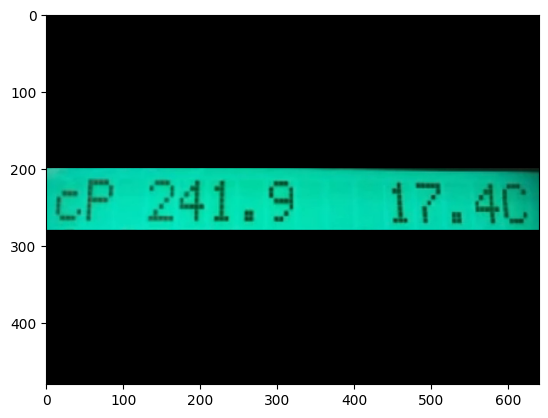

In [20]:
cap = cv2.VideoCapture("Videos/Start1.avi")
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
ready, frame = cap.read()
frame = frame
# [200:280]
plt.imshow(frame)

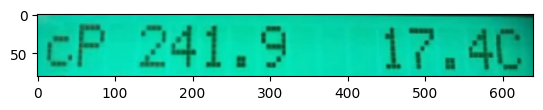

In [5]:
frame2 = frame[:, :, :]
frame2 = (frame2 + 1) % 256
plt.imshow(frame2)

In [2]:
import easyocr

In [3]:
reader = easyocr.Reader(['en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [10]:
result = reader.readtext(frame)

# test easy ocr

In [19]:
cap = cv2.VideoCapture("Videos/Start5.avi")
pdf_file = PdfPages('Easy_Start5_test.pdf')

fps = int(cap.get(cv2.CAP_PROP_FPS))
video_len = int(cap.get(cv2.CAP_PROP_FRAME_COUNT) / fps)

diap = tqdm(iterable=range(fps * 87, fps * 89, int(fps / 5)))
try:
    for i in diap:
        cap.set(cv2.CAP_PROP_POS_FRAMES, i)
        ready, frame = cap.read()
        frame = frame[100:142]
        result = reader.readtext(frame)

        if ready:
            fig, ax = plt.subplots()

            ax.imshow(frame)
            text_result = ' -- '.join([
                f'{value}({confidence*100:.0f})'
                for _, value, confidence in result
            ])
            ax.set_title(f'T= {round(i/fps,1)}  R= {text_result}')

            fig.savefig(pdf_file, format='pdf')
            plt.close()
except:
    print('Error has been detected')
finally:
    pdf_file.close()

100%|██████████| 10/10 [00:02<00:00,  4.87it/s]


In [18]:
' '.join([value for _, value, confidence in result])


'CP 241.9 17.4C'

# cut picture

In [5]:
import plotly.express as px
from skimage import data

img = data.chelsea()
fig = px.imshow(img)
# fig.add_annotation(
#     x=0.5,
#     y=0.9,
#     text="Drag and draw annotations",
#     xref="paper",
#     yref="paper",
#     showarrow=False,
#     font_size=20, font_color='cyan')
# Shape defined programatically
# fig.add_shape(
#     type='rect',
#     x0=230, x1=290, y0=230, y1=280,
#     xref='x', yref='y',
#     line_color='cyan'
# )
# Define dragmode, newshape parameters, amd add modebar buttons


# fig.update_layout(dragmode='drawrect', newshape=dict(line_color='cyan'))

fig.show(config={'modeBarButtonsToAdd': ['drawrect', 'eraseshape']})


In [14]:
frame.shape

(80, 640, 3)

In [27]:
import plotly.graph_objs as go
from plotly.colors import n_colors

# Загрузка изображения
img = go.Image(z=frame)

# Определение области, которую нужно обрезать
clip_path = go.Scatter(
    x=[100, 300, 300, 100],
    y=[100, 100, 300, 300],
    fill='toself'
)

# Определение фигуры с изображением и обрезанной областью
fig = go.Figure(data=[img])
fig.update_layout(width=600, height=600)
fig.update_layout(images=[dict(
    data=img,
    xref='x',
    yref='y',
    x=clip_path.x[0],
    y=clip_path.y[0],
    sizex=clip_path.x[2] - clip_path.x[0],
    sizey=clip_path.y[2] - clip_path.y[0],
    sizing='stretch',
    opacity=1.0,
    layer='below',
    # sourcetype='image',
    # sourceopacity=1.0,
    # clippath=f"test.jpg",
    # cliponaxis=False
)])

# Определение цветов для обрезки
colors = n_colors('rgb(255, 0, 0)', 'rgb(0, 0, 255)', 10)

# Определение состояния для обрезки
state = {'color': 0}

# Обработчик событий для кликов мыши
def handle_click(trace, points, state):
    if len(points.point_inds) > 0:
        state['color'] = (state['color'] + 1) % len(colors)
        color = colors[state['color']]
        fig.update_traces(patch=dict(fillcolor=color))

# Добавление обработчика событий для кликов мыши
fig.data[0].on_click(lambda trace, points, state: handle_click(trace, points, state))

# Отображение фигуры
fig.show()

ValueError: Invalid property specified for object of type plotly.graph_objs.layout.Image: 'data'

Did you mean "name"?

    Valid properties:
        layer
            Specifies whether images are drawn below or above
            traces. When `xref` and `yref` are both set to `paper`,
            image is drawn below the entire plot area.
        name
            When used in a template, named items are created in the
            output figure in addition to any items the figure
            already has in this array. You can modify these items
            in the output figure by making your own item with
            `templateitemname` matching this `name` alongside your
            modifications (including `visible: false` or `enabled:
            false` to hide it). Has no effect outside of a
            template.
        opacity
            Sets the opacity of the image.
        sizex
            Sets the image container size horizontally. The image
            will be sized based on the `position` value. When
            `xref` is set to `paper`, units are sized relative to
            the plot width. When `xref` ends with ` domain`, units
            are sized relative to the axis width.
        sizey
            Sets the image container size vertically. The image
            will be sized based on the `position` value. When
            `yref` is set to `paper`, units are sized relative to
            the plot height. When `yref` ends with ` domain`, units
            are sized relative to the axis height.
        sizing
            Specifies which dimension of the image to constrain.
        source
            Specifies the URL of the image to be used. The URL must
            be accessible from the domain where the plot code is
            run, and can be either relative or absolute.
        templateitemname
            Used to refer to a named item in this array in the
            template. Named items from the template will be created
            even without a matching item in the input figure, but
            you can modify one by making an item with
            `templateitemname` matching its `name`, alongside your
            modifications (including `visible: false` or `enabled:
            false` to hide it). If there is no template or no
            matching item, this item will be hidden unless you
            explicitly show it with `visible: true`.
        visible
            Determines whether or not this image is visible.
        x
            Sets the image's x position. When `xref` is set to
            `paper`, units are sized relative to the plot height.
            See `xref` for more info
        xanchor
            Sets the anchor for the x position
        xref
            Sets the images's x coordinate axis. If set to a x axis
            id (e.g. "x" or "x2"), the `x` position refers to a x
            coordinate. If set to "paper", the `x` position refers
            to the distance from the left of the plotting area in
            normalized coordinates where 0 (1) corresponds to the
            left (right). If set to a x axis ID followed by
            "domain" (separated by a space), the position behaves
            like for "paper", but refers to the distance in
            fractions of the domain length from the left of the
            domain of that axis: e.g., *x2 domain* refers to the
            domain of the second x  axis and a x position of 0.5
            refers to the point between the left and the right of
            the domain of the second x axis.
        y
            Sets the image's y position. When `yref` is set to
            `paper`, units are sized relative to the plot height.
            See `yref` for more info
        yanchor
            Sets the anchor for the y position.
        yref
            Sets the images's y coordinate axis. If set to a y axis
            id (e.g. "y" or "y2"), the `y` position refers to a y
            coordinate. If set to "paper", the `y` position refers
            to the distance from the bottom of the plotting area in
            normalized coordinates where 0 (1) corresponds to the
            bottom (top). If set to a y axis ID followed by
            "domain" (separated by a space), the position behaves
            like for "paper", but refers to the distance in
            fractions of the domain length from the bottom of the
            domain of that axis: e.g., *y2 domain* refers to the
            domain of the second y  axis and a y position of 0.5
            refers to the point between the bottom and the top of
            the domain of the second y axis.
        
Did you mean "name"?

Bad property path:
data
^^^^